In [41]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import matplotx
import numpy as np

### Configuration

In [42]:
# enter the path to the results file
ABS_PATH_TO_RESULTS = "/hpi/fs00/home/julian.zabbarov/documents/tree-detection/experiments/sauen/results"
ABS_PATH_TO_BASELINE = "/hpi/fs00/home/julian.zabbarov/documents/tree-detection/experiments/sauen/results/baseline/prediction_on_3510b2.csv" # baseline being prediction without fine-tuning

### Loading

Loading fine-tuning results

In [43]:
# Initialize an empty list to store the results
results = []

# Root directory containing the results
root_dir = ABS_PATH_TO_RESULTS

# Iterate over each epoch directory (e.g., epochs-1, epochs-2, ...)
for epoch_dir in os.listdir(root_dir):
    epoch_path = os.path.join(root_dir, epoch_dir)
    
    # Check if it's a directory (to avoid files that might exist in the root_dir)
    if os.path.isdir(epoch_path):
        # Iterate over 'train' and 'test' directories inside each epoch folder
        for type_dir in ['train', 'test']:
            type_path = os.path.join(epoch_path, type_dir)
            
            # Check if the 'train' or 'test' folder exists
            if os.path.isdir(type_path):
                # Iterate over each CSV file (experiment result) in the type_dir
                for csv_file in os.listdir(type_path):
                    # Get the experiment name (filename without extension)
                    experiment_name = os.path.splitext(csv_file)[0]
                    
                    # Load the CSV file
                    csv_path = os.path.join(type_path, csv_file)
                    df = pd.read_csv(csv_path)
                    
                    # Add the experiment name, epoch, and type to each row in the CSV
                    for index, row in df.iterrows():
                        results.append({
                            'experiment_name': experiment_name,
                            'epochs': epoch_dir.strip('epochs-'),
                            'type': type_dir,
                            'metric': row['metric'],
                            'score': row['score']
                        })

# Convert the results list to a pandas DataFrame
finetuning_df = pd.DataFrame(results)
# cast epochs to int
finetuning_df['epochs'] = finetuning_df['epochs'].astype(int)
results_df = finetuning_df.sort_values('epochs', ascending=True)

Loading baseline

In [44]:
baseline_df = pd.read_csv(ABS_PATH_TO_BASELINE)
print(baseline_df)

      metric     score
0  precision  0.708502
1     recall  0.804598
2         f1  0.753498


### Analysis

In [45]:
# best f1 test score for each experiment
best_f1_test = results_df[(results_df['type'] == 'test') & (results_df["metric"] == "f1")].groupby('experiment_name').max().sort_values('score', ascending=False)
best_f1_test

,epochs,type,metric,score
experiment_name,,,,
semisupervised_finetuning,13,test,f1,0.790800
finetuning_on_3512a1,13,test,f1,0.784053
double_finetuning,13,test,f1,0.783664
finetuning_on_3512a1_2x3,13,test,f1,0.757916


In [46]:
# best f1 train score for each experiment
best_f1_test = results_df[(results_df['type'] == 'train') & (results_df["metric"] == "f1")].groupby('experiment_name').max().sort_values('score', ascending=False)
best_f1_test

,epochs,type,metric,score
experiment_name,,,,
finetuning_on_3512a1,13,train,f1,0.904110
finetuning_on_3512a1_2x3,13,train,f1,0.897196
double_finetuning,13,train,f1,0.896465
semisupervised_finetuning,13,train,f1,0.884472


### Visualizations

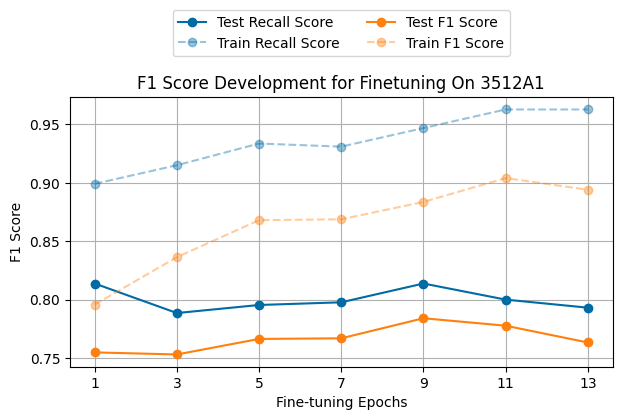

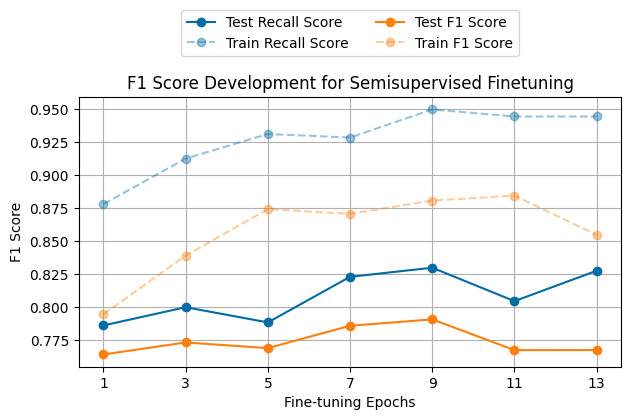

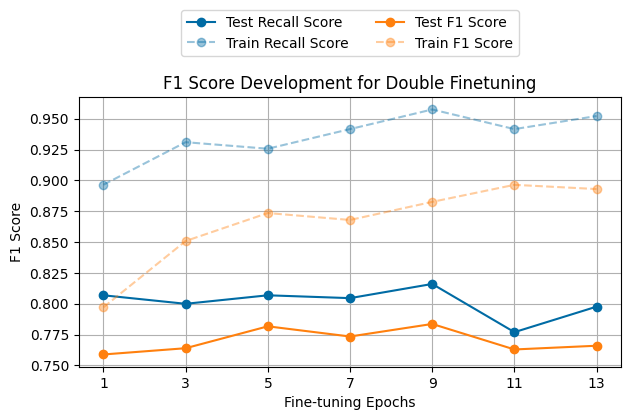

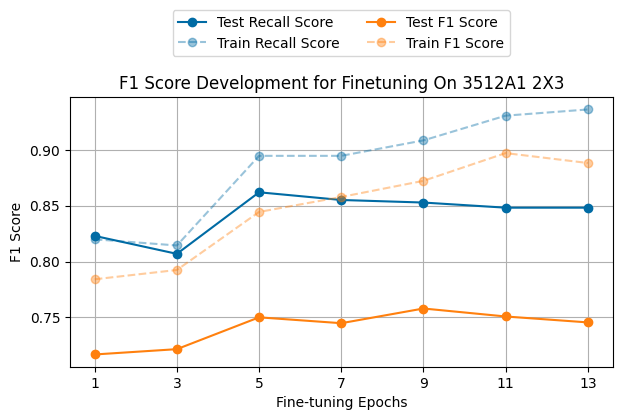

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Sample baseline DataFrame (contains one baseline for all experiments)
# Example format for baseline_df:
# baseline_df = pd.DataFrame({
#     'metric': ['precision', 'recall', 'f1'],
#     'score': [0.708502, 0.804598, 0.753498]
# })

plt.style.use('tableau-colorblind10')

# Create a plot for each experiment
experiment_names = results_df['experiment_name'].unique()

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for experiment in experiment_names:
    # Plot the f1 scores over epochs
    plt.figure(figsize=(7, 3.5))

    for metric_idx, metric in enumerate(["recall", "f1"]):
        # Extract the baseline F1 score
        baseline_f1 = baseline_df[baseline_df['metric'] == metric]['score'].values[0]
        # Filter out f1 metric from the DataFrame
        f1_df = results_df[results_df['metric'] == metric].copy()

        # Get the data for this specific experiment
        test_data = f1_df[(f1_df['experiment_name'] == experiment) & (f1_df['type'] == 'test')]
        train_data = f1_df[(f1_df['experiment_name'] == experiment) & (f1_df['type'] == 'train')]
        
        # Sort by epochs to ensure proper plotting
        test_data = test_data.sort_values('epochs')
        train_data = train_data.sort_values('epochs')
    
        plt.plot(test_data['epochs'], test_data['score'], label=f'Test {metric} Score'.title(), marker='o', c=color_cycle[metric_idx])
        plt.plot(train_data['epochs'], train_data['score'], label=f'Train {metric} Score'.title(), marker='o', linestyle='--', c=color_cycle[metric_idx], alpha=0.4)
    
        # Plot the baseline f1 score as a horizontal line
        # plt.axhline(y=baseline_f1, color='r', linestyle='--', label=f'Baseline F1 Score ({baseline_f1:.3f})')
    
    # Add labels and title
    plt.title(f'F1 Score Development for {experiment.replace("_", " ").title()}')
    plt.xlabel('Fine-tuning Epochs')
    plt.xticks(np.arange(1,max(results_df["epochs"])+1,2), np.arange(1,max(results_df["epochs"])+1,2))
    plt.ylabel('F1 Score')
    plt.legend()
    # Move the legend outside the plot at the top
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=2, fancybox=True, shadow=False, fontsize=10)
    plt.grid(True)
    
    # Show the plot
    plt.show()

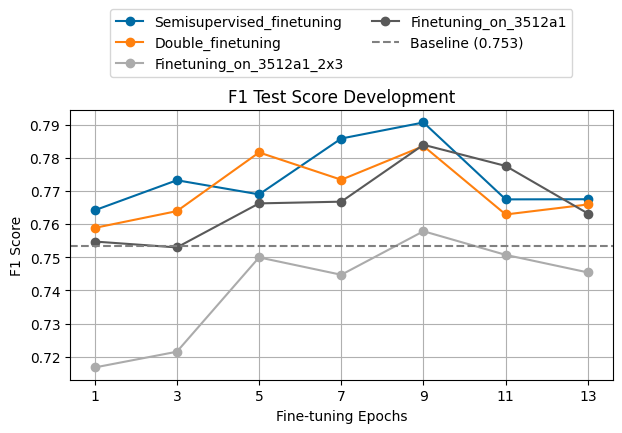

In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Sample baseline DataFrame (contains one baseline for all experiments)
# Example format for baseline_df:
# baseline_df = pd.DataFrame({
#     'metric': ['precision', 'recall', 'f1'],
#     'score': [0.708502, 0.804598, 0.753498]
# })

plt.style.use('tableau-colorblind10')

# Extract the baseline F1 score
baseline_f1 = baseline_df[baseline_df['metric'] == 'f1']['score'].values[0]

# Generate results_df from the previous step (assuming you've already run the previous code)
# results_df = <DataFrame with experiment results>

# Filter out f1 metric from the DataFrame
f1_df = results_df[results_df['metric'] == 'f1'].copy()

# Create a plot for each experiment
experiment_names = f1_df['experiment_name'].unique()

# Plot the f1 scores over epochs
plt.figure(figsize=(7, 3.5))

for exp_idx, experiment in enumerate(experiment_names):
    # Get the data for this specific experiment
    test_data = f1_df[(f1_df['experiment_name'] == experiment) & (f1_df['type'] == 'test')]
    
    # Sort by epochs to ensure proper plotting
    test_data = test_data.sort_values('epochs')
    
    # Plot the f1 scores over epochs
    plt.plot(test_data['epochs'], test_data['score'], label=f'{experiment}'.capitalize(), marker='o')
    
# Plot the baseline f1 score as a horizontal line
plt.axhline(y=baseline_f1, color='grey', linestyle='--', label=f'Baseline ({baseline_f1:.3f})')
    
# Add labels and title
plt.title(f'F1 Test Score Development')
plt.xlabel('Fine-tuning Epochs')
plt.ylabel('F1 Score')
plt.xticks(np.arange(1,max(results_df["epochs"])+1,2), np.arange(1,max(results_df["epochs"])+1,2))
plt.legend()
plt.grid(True)

# Move the legend outside the plot at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2, fancybox=True, shadow=False, fontsize=10)

# Show the plot
plt.show()